In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 18 20:17:53 2020

@author: robert_normand
"""

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Download Data from Yahoo Finance
import datetime
import matplotlib.pyplot as plt
import pandas as pd
# Pour lire les données de Yahoo Finance, vous devez installer le toolbox yfinance
import yfinance as yf 

start_sp = datetime.datetime(2006,3,31)
end_sp = datetime.datetime(2020, 12,31)

# Use Vanguard ETF
# SP500 Index + 11 Industry


BLack_ETF=['IVV','IWF','IJH','IJR','IWM','IWD','ITOT','IVW','IWB','IWR','DVY',
           'IVE','IWP','IWS','IWV','IUSG','IWO','IWN','IBB','IJK','IUSV',
           'OEF','IJS','IJJ','IYW','IHI','IJT','ITA','IGV','IYH','SOXX','EWC',
           'IGM','IYF','JKE','SUSA','IDU','IYY','IYG','JKD','IYC','IYJ','JKG',
           'IWC','IYK','JKF','JKH','IYT','JKI','IYZ','IGE','IYE','JKL','IYM',
           'JKJ','JKK','IGN']

Data = yf.download(BLack_ETF, start=start_sp, end=end_sp,group_by="ticker")

# To access data for SP500
SP500_dat=Data['IVW']

# To access the adjusted close price, use
Data['IVW']['Adj Close']

# Graph data
Data['IVW']['Adj Close'].plot(grid=True)

# To get Information about a ticker
SP500_detail = yf.Ticker("IVW")

# Show stock info
#SP500_detail.info


[*********************100%***********************]  57 of 57 completed


In [2]:
#SP500_dat

In [3]:
#les rendements quotidiens
from pandas_datareader import data, wb
df = pd.DataFrame([data.DataReader(etf, 'yahoo', start_sp, end_sp)['Adj Close'] for etf in BLack_ETF]).T
df.columns = BLack_ETF
rendement = df.pct_change()
#rendement

In [4]:
# Mettre le rendement en 0 = descente 1= montée
j=1
for ticker in BLack_ETF:
    for j in range(len(rendement)):
        if rendement[ticker][j]<0:
            rendement[ticker][j]=0
        else:
            rendement[ticker][j]=1
rendement_bin=rendement
#rendement_bin

In [5]:
Data['IVV']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-03-31,130.289993,130.419998,129.559998,129.919998,97.379745,1533900.0
2006-04-03,130.250000,131.039993,129.759995,129.899994,97.364769,1538300.0
2006-04-04,129.889999,130.880005,129.559998,130.800003,98.039360,1111400.0
2006-04-05,130.809998,131.399994,130.600006,131.270004,98.391655,1257100.0
2006-04-06,131.059998,131.389999,130.399994,131.009995,98.196739,1010400.0
2006-04-07,131.300003,131.589996,129.559998,129.789993,97.282295,1514900.0
2006-04-10,129.880005,130.270004,129.490005,130.000000,97.439735,3556600.0
2006-04-11,130.039993,130.259995,128.529999,128.899994,96.615250,1054400.0
2006-04-12,128.940002,129.300003,128.839996,129.070007,96.742683,1337400.0


# Pour chacun des ETF, vous fournissez les statistiques de base

a.	Rendement moyen, volatilité, quantile, etc.

In [6]:
list_etf = []
for etf in BLack_ETF:
    list_etf.append(df[etf].describe())

b.	L’analyse peut être présentée sous forme de tableaux et graphiques 

In [7]:
#list_etf

In [8]:
df_describe = pd.DataFrame(list_etf)

In [9]:
#df_describe

2.	Par la suite, vous validez la performance des 5 indicateurs techniques appliqués sur chaque ETF

a.	Vous calculez la performance du signal

In [124]:
from Data_TP2_V2 import BBANDS, STOK, MACD, RSI, MFI

###### BollingerBands, Oscilateur stochastique, MACD, RSI, Money Flow

1- Indicateur

In [123]:
result_BB = pd.DataFrame()
result_STOK = pd.DataFrame()
result_MACD = pd.DataFrame()
result_RSI = pd.DataFrame()
result_MFI = pd.DataFrame()
for ticker in BLack_ETF:
    
    df = BBANDS(Data[ticker],"Close",21,2)
    result_BB[ticker+'_UP'] = df.iloc[:,-1]
    result_BB[ticker+'_DOWN'] = df.iloc[:,-2]
    
    df = STOK(Data[ticker])
    result_STOK[ticker] = df.iloc[:,-1]
    
    df = MACD(Data[ticker],"Adj Close",5,25,9)
    result_MACD[ticker] = df.iloc[:,-1]
    result_MACD[ticker+'_SIGN'] = df.iloc[:,-2]
    result_MACD[ticker+'_DIFF'] = df.iloc[:,-3]
    
    df = RSI(Data[ticker],14)
    result_RSI[ticker] = df.iloc[:,-1]
    
    df = MFI(Data[ticker],14)
    result_MFI[ticker] = df.iloc[:,-1]
    

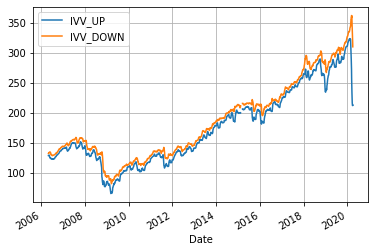

In [122]:
#Exemple de graphique
mycolumn=['IVV_UP','IVV_DOWN']
result_BB[mycolumn].plot(grid=True)

2 - Signal

In [ ]:
# Pour RSI -> si RSI < 30 = Buy ; Si RSI > 70 = SELL   

b.	Vous fournissez les statistiques sur la performance de la classification

In [141]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc

1) Generic Accuracy

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
sklearn.metrics.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None, normalize=None)

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
sklearn.metrics.auc(x, y)